# Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPRegressor as rede_neural
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import f_oneway
from sklearn.model_selection import GridSearchCV
import Classes as Cls
import pickle
import math

# Funções

In [2]:
def describe_dist_var(dataframe_1,dataframe_2,var):
    distancias_var = {}
        
    for periodo in range(52):
        aux = []
        for list_1 in dataframe_1[var]:
            for list_2 in dataframe_2[var]:
                aux.append(math.fabs(list_1[periodo]-list_2[periodo]))
        distancias_var[f'x{periodo+1}'] = aux

    return pd.DataFrame(distancias_var)

In [3]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(52):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [4]:
def describe_var_grafico(describe1_var,describe2_var):

    plt.plot(range(52),describe1_var.iloc[1,:])
    plt.plot(range(52),describe2_var.iloc[1,:])


In [5]:
def plot_dist(describe_dist_var):
    plt.plot(range(52),describe_dist_var.iloc[1,:])

# Importação dos modelos de aprendizado

In [6]:
n=10

funcao_demanda = lambda i,j: [(i*6-j*2)**2+10000]

x = [[j] for j in range(52) for i in range(n)]

y = pd.read_csv('demandas')['y'].values

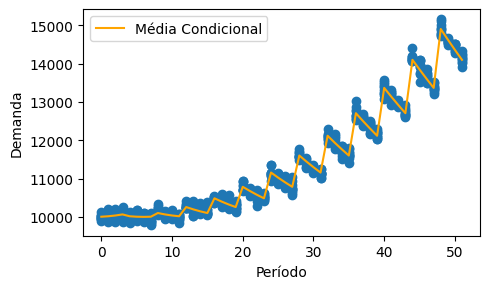

In [29]:
fig=plt.figure(figsize=(10,10))

plt.scatter(x,y)


x_unique = [[i] for i in range(52)]

medias_reais = [funcao_demanda(i,j) for i in range(13) for j in range(1,5)]

plt.plot(x_unique,medias_reais,color='orange',label='Média Condicional')

plt.ylabel('Demanda')
plt.xlabel('Período')
plt.legend()
plt.tight_layout()
plt.savefig('Imgs\demandas.png', format='png')

plt.show()

In [13]:
with open("modelos_binarios", "rb") as arquivo_binario:
  while True:
    try:
        modelos = pickle.load(arquivo_binario)
    except EOFError:
        break

In [14]:
resultados = pd.DataFrame({'Random forest': modelos.medias_desempenho[0],
                           'Rede Neural': modelos.medias_desempenho[1],})

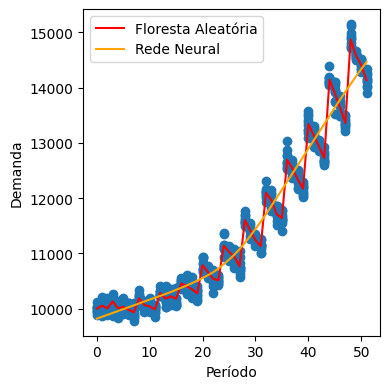

In [33]:
fig=plt.figure(figsize=(4,4))

plt.scatter(x,y)
plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(0,x_unique).reshape(-1,1)),color='red',label='Floresta Aleatória')

plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(1,x_unique).reshape(-1,1)),color='orange',label='Rede Neural')


plt.ylabel('Demanda')
plt.xlabel('Período')

plt.legend()
plt.tight_layout()
plt.savefig('Imgs\demandas_reg.png', format='png')
plt.show()

[]

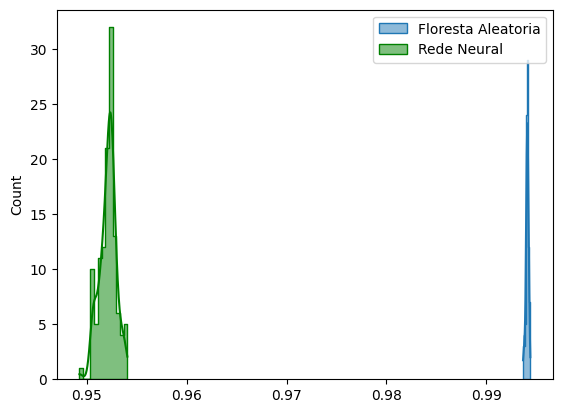

In [28]:
sns.histplot(modelos.medias_desempenho[0], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(modelos.medias_desempenho[1], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.plot()

In [29]:
resultados.describe()

,Random forest,Rede Neural
count,120.000000,120.000000
mean,0.994097,0.952116
std,0.000145,0.000837
min,0.993684,0.949269
25%,0.994021,0.951625
50%,0.994118,0.952222
75%,0.994189,0.952578
max,0.994416,0.954063


## Analise de Normalidade dos dados de desempenho médio

In [30]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(modelos.medias_desempenho[0])
_,p['Rede Neural'] = shapiro(modelos.medias_desempenho[1])
#H0=seguem distribuição normal
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Não pode rejeitar a hipotese de normalidade para os desempenhos médio da {i}')

Média amostral de desempenho da Random Forest não segue uma normal
Média amostral de desempenho da Rede Neural não segue uma normal


## Analise de comparação dos dados de desempenho médio

In [31]:
_,aux = f_oneway(modelos.medias_desempenho[0],modelos.medias_desempenho[1])

In [32]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes


# Resultados Modelo PI

## Importação dos Dados

In [33]:
resultados_1 = pd.read_csv('Resultados_PI_RR').iloc[:,1:]
resultados_2 = pd.read_csv('Resultados_PI_RN').iloc[:,1:]

In [34]:
resultados_dataframe_1 = {}
for column in range(len(resultados_1.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_1.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_1.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_1[resultados_1.columns[column]] = coluna_aux

resultados_dataframe_1['ObjVal'] = resultados_1['ObjVal']

resultados_dataframe_1 = pd.DataFrame(resultados_dataframe_1)

In [35]:
resultados_dataframe_2 = {}
for column in range(len(resultados_2.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_2.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_2.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_2[resultados_2.columns[column]] = coluna_aux

resultados_dataframe_2['ObjVal'] = resultados_2['ObjVal']

resultados_dataframe_2 = pd.DataFrame(resultados_dataframe_2)
        

In [36]:
resultados_dataframe_2

,x,s,y,xr,sr,yr,ObjVal
0,"[9825.173654193337, 9860.948756440252, 9896.72...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 494.8261919638509, 0.0, 0...","[98.25173654193337, 196.8612241063359, 295.828...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, -0.0, 1...",14671.204448
1,"[9919.434184497963, 9939.357792034862, 9959.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 1.5916157281026244e-12, 497.92...","[99.19434184497963, 198.58791976532825, 298.17...","[-0.0, -0.0, -0.0, 0.0, 1.0, -0.0, -0.0, 0.0, ...",14671.732246
2,"[9936.75310576465, 9956.283798323755, 9975.608...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 1.2647660696529783e-12, 498.77...","[99.3675310576465, 198.93036904088405, 298.686...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 1...",14672.545743
3,"[9879.042563303497, 9905.518251838483, 9930.88...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 496.5227161437409, 0.0, 0...","[98.79042563303497, 197.84560815141987, 297.15...","[-0.0, -0.0, -0.0, 0.0, 1.0, -0.0, -0.0, 0.0, ...",14672.229181
4,"[9822.603586146015, 9854.869875768927, 9887.13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 494.3568082695919, 0.0, 0...","[98.22603586146015, 196.7747346191494, 295.646...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 1...",14671.964661
...,...,...,...,...,...,...,...
195,"[9939.094005870187, 9957.37873665653, 9975.412...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 498.7358709757028, 0.0, 0...","[99.39094005870187, 198.96472742526717, 298.71...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14671.969839
196,"[9875.855274365793, 9902.977831310112, 9929.49...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 9.24075406129043e-12, 496.4685...","[98.75855274365793, 197.78833105675903, 297.08...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, -0.0, 1...",14671.146864
197,"[9860.026347245137, 9890.796504995036, 9921.56...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 496.041081711084, 0.0, 0....","[98.60026347245137, 197.50822852240174, 296.72...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 1...",14671.926379
198,"[9828.367913467655, 9860.150780764256, 9891.93...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 494.596682403043, 0.0, 0....","[98.28367913467655, 196.8851869423191, 295.804...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14671.240598


## Comparação dos valores que cada componente de cada variavel toma

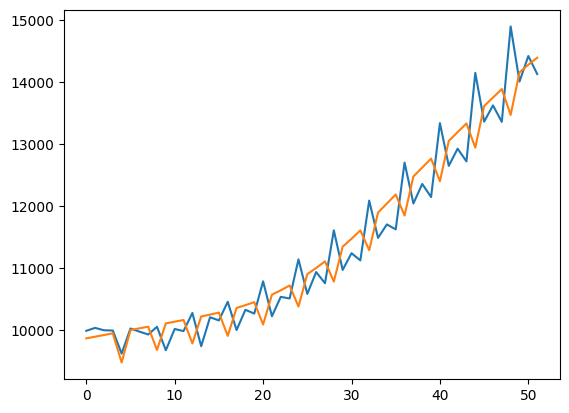

In [37]:
describe1_x = describe_var(resultados_dataframe_1,'x').describe()
describe2_x = describe_var(resultados_dataframe_2,'x').describe()
describe_var_grafico(describe1_x,describe2_x)

In [40]:
describe1_x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,9992.601548,10039.595156,10001.264374,9997.368369,9625.504956,10029.630842,9980.105286,9933.194416,10057.022120,9679.120544,...,12927.932597,12723.500736,14149.491334,13363.800130,13625.867630,13360.803240,14897.946706,14010.131996,14421.897866,14131.684168
std,6.966703,11.568806,8.772653,169.474424,208.528669,8.439853,7.888905,11.029014,211.846583,210.321991,...,5.053753,10.930314,9.973956,18.163937,11.517499,9.553477,14.510585,4.560685,9.241207,11.989994
min,9974.624552,10000.168591,9977.198005,9667.525977,9488.701332,10003.951980,9959.820698,9904.993053,9653.282294,9546.167581,...,12915.710119,12689.631147,14129.102778,13304.930209,13599.254945,13334.384762,14858.385230,13998.167537,14398.086947,14107.403427
25%,9987.613483,10032.050643,9994.293642,10065.550844,9506.253090,10023.866575,9974.609815,9925.600061,10155.577664,9559.917310,...,12924.971858,12716.808558,14142.078364,13352.299783,13618.201574,13354.575068,14887.633184,14006.807652,14416.135065,14123.772918
50%,9992.764390,10039.618899,10001.898749,10084.816102,9512.970433,10029.569558,9979.542787,9933.198744,10170.955983,9565.851035,...,12927.358298,12722.524785,14148.638198,13365.029795,13625.431419,13360.832905,14897.502105,14010.361415,14421.306638,14130.920913
75%,9997.557638,10047.604919,10006.350676,10097.040297,9528.398380,10036.184513,9984.791118,9940.855919,10177.514820,9576.183899,...,12931.167772,12730.865211,14156.202260,13375.257601,13633.978964,13367.133380,14907.036193,14013.262290,14427.974883,14140.020520
max,10006.226119,10065.845592,10027.632918,10130.737696,10014.189683,10052.199790,10001.105375,9970.120640,10197.674246,10069.480565,...,12942.146652,12754.975842,14181.560415,13418.094866,13658.782937,13382.659177,14943.280871,14020.777069,14453.824141,14167.880490


In [41]:
describe1_x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,9992.601548,10039.595156,10001.264374,9997.368369,9625.504956,10029.630842,9980.105286,9933.194416,10057.022120,9679.120544,...,12927.932597,12723.500736,14149.491334,13363.800130,13625.867630,13360.803240,14897.946706,14010.131996,14421.897866,14131.684168
std,6.966703,11.568806,8.772653,169.474424,208.528669,8.439853,7.888905,11.029014,211.846583,210.321991,...,5.053753,10.930314,9.973956,18.163937,11.517499,9.553477,14.510585,4.560685,9.241207,11.989994
min,9974.624552,10000.168591,9977.198005,9667.525977,9488.701332,10003.951980,9959.820698,9904.993053,9653.282294,9546.167581,...,12915.710119,12689.631147,14129.102778,13304.930209,13599.254945,13334.384762,14858.385230,13998.167537,14398.086947,14107.403427
25%,9987.613483,10032.050643,9994.293642,10065.550844,9506.253090,10023.866575,9974.609815,9925.600061,10155.577664,9559.917310,...,12924.971858,12716.808558,14142.078364,13352.299783,13618.201574,13354.575068,14887.633184,14006.807652,14416.135065,14123.772918
50%,9992.764390,10039.618899,10001.898749,10084.816102,9512.970433,10029.569558,9979.542787,9933.198744,10170.955983,9565.851035,...,12927.358298,12722.524785,14148.638198,13365.029795,13625.431419,13360.832905,14897.502105,14010.361415,14421.306638,14130.920913
75%,9997.557638,10047.604919,10006.350676,10097.040297,9528.398380,10036.184513,9984.791118,9940.855919,10177.514820,9576.183899,...,12931.167772,12730.865211,14156.202260,13375.257601,13633.978964,13367.133380,14907.036193,14013.262290,14427.974883,14140.020520
max,10006.226119,10065.845592,10027.632918,10130.737696,10014.189683,10052.199790,10001.105375,9970.120640,10197.674246,10069.480565,...,12942.146652,12754.975842,14181.560415,13418.094866,13658.782937,13382.659177,14943.280871,14020.777069,14453.824141,14167.880490


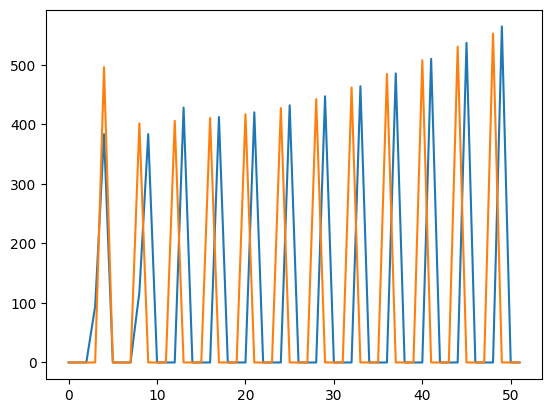

In [ ]:
describe1_xr = describe_var(resultados_dataframe_1,'xr').describe()
describe2_xr = describe_var(resultados_dataframe_2,'xr').describe()
describe_var_grafico(describe1_xr,describe2_xr)

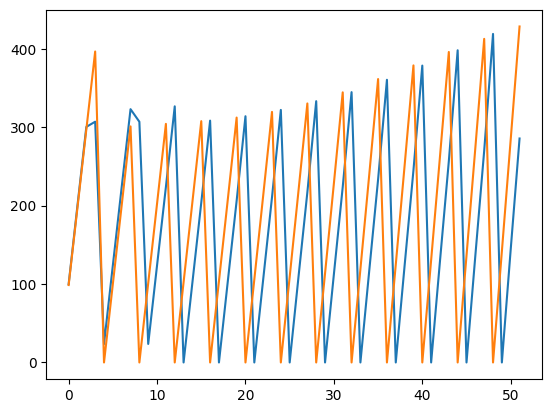

In [ ]:
describe1_sr = describe_var(resultados_dataframe_1,'sr').describe()
describe2_sr = describe_var(resultados_dataframe_2,'sr').describe()
describe_var_grafico(describe1_sr,describe2_sr)

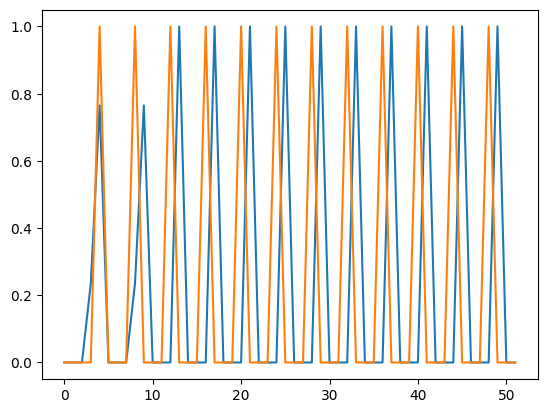

In [ ]:
describe1_yr = describe_var(resultados_dataframe_1,'yr').describe()
describe2_yr = describe_var(resultados_dataframe_2,'yr').describe()
describe_var_grafico(describe1_yr,describe2_yr)

### distancia entre os pontos provindos dos resultados do Random Forest e entre da Rede Neural

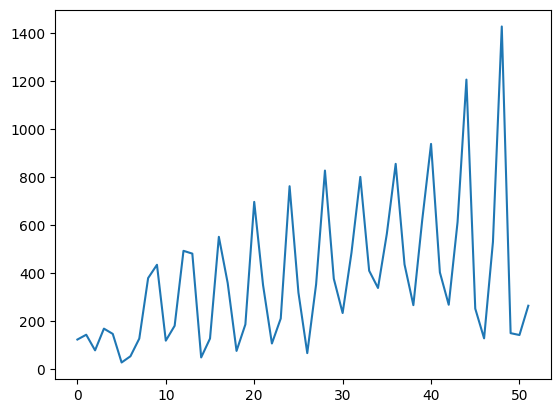

In [ ]:
describe_x_3 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_2,'x').describe()
plot_dist(describe_x_3) 
# rf     rn
#[1,2] [2,3]
#[3,4] [3,5]
#[5,5] [2,4]

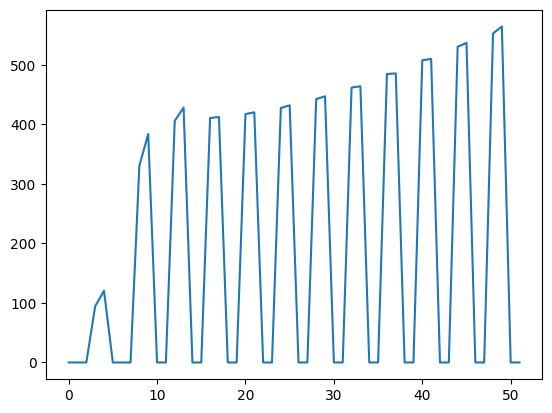

In [ ]:
describe_xr_3 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_2,'xr').describe()
plot_dist(describe_xr_3)

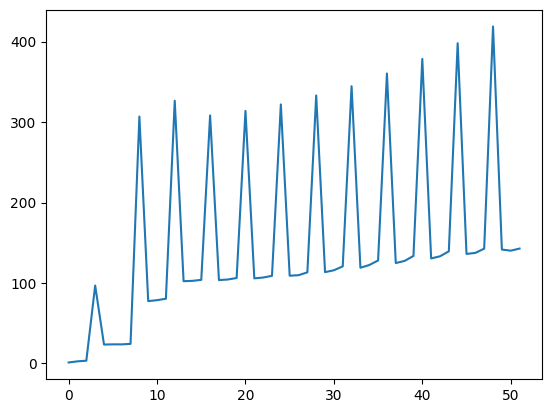

In [ ]:
describe_sr_3 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_2,'sr').describe()
plot_dist(describe_sr_3)

## Analise dos valores objetivos obtidos


[]

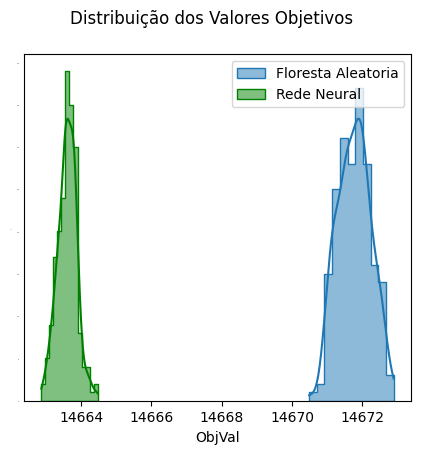

In [ ]:
fig=plt.figure(figsize=(5,4.5))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.histplot(resultados_dataframe_2['ObjVal'], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(resultados_dataframe_1['ObjVal'], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.plot()

Random Forest

In [ ]:
resultados_dataframe_1['ObjVal'].describe()

count      200.000000
mean     14663.609782
std          0.271269
min      14662.872011
25%      14663.433600
50%      14663.614272
75%      14663.783010
max      14664.472234
Name: ObjVal, dtype: float64

Rede Neural

In [ ]:
resultados_dataframe_2['ObjVal'].describe()

count      200.000000
mean     14671.772822
std          0.467728
min      14670.488456
25%      14671.448552
50%      14671.792545
75%      14672.096389
max      14672.891101
Name: ObjVal, dtype: float64

In [ ]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(resultados_dataframe_1['ObjVal'])
_,p['Rede Neural'] = shapiro(resultados_dataframe_2['ObjVal'])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Não pode rejeitar a hipotese de normalidade para os desempenhos médio da {i}')

Média amostral de desempenho da Random Forest segue uma normal
Média amostral de desempenho da Rede Neural segue uma normal


In [ ]:
_,aux = f_oneway(resultados_dataframe_1['ObjVal'].values,resultados_dataframe_2['ObjVal'].values)

In [ ]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes
